In [1]:
import json
import pandas as pd
import re

In [2]:
with open('data/review_553850.json') as f:
    data = json.load(f)



In [3]:
data['reviews']['160675747']

{'recommendationid': '160675747',
 'author': {'steamid': '76561199051671846',
  'num_games_owned': 120,
  'num_reviews': 26,
  'playtime_forever': 1334,
  'playtime_last_two_weeks': 1291,
  'playtime_at_review': 1334,
  'last_played': 1710604498},
 'language': 'english',
 'review': '↑→↓↓↓',
 'timestamp_created': 1710601920,
 'timestamp_updated': 1710601920,
 'voted_up': True,
 'votes_up': 0,
 'votes_funny': 0,
 'weighted_vote_score': 0,
 'comment_count': 0,
 'steam_purchase': False,
 'received_for_free': False,
 'written_during_early_access': False,
 'hidden_in_steam_china': True,
 'steam_china_location': ''}

In [4]:
# print few keys
print(list(data.keys()))
# print(data['reviews'].keys())
# print few values in reviews
print(list(data['reviews'])[:2])
print(list(data['query_summary'])[:2])
print(list(data['cursors'])[:2])


['reviews', 'query_summary', 'cursors']
['160675747', '160675705']
['num_reviews', 'review_score']
['AoJwoLGp1Y0DcpqF3AQ=']


# Checking the data structure of the dataset

In [6]:
# Extract 'review' and 'votes_funny' from each review
reviews = []
votes_funny = []
languages = []
voted_up = []
votes_up = []
for review_id, review_data in data['reviews'].items():
    reviews.append(review_data['review'])
    votes_funny.append(review_data['votes_funny'])
    languages.append(review_data['language'])
    voted_up.append(review_data['voted_up'])
    votes_up.append(review_data['votes_up'])

We will check the data structure of the dataset to understand the data types of the columns and the number of missing values in each column. Also we are isolating the relavenat columns for the analysis. In this casem we are isolating the reviews of the game to determine if the revirews are positive or negative. If the reviews are helpful or not and finally if they are funny are not, also we chek the language of the reviews.

In [8]:

# Make pandas dataframe
pd.set_option('display.max_colwidth', 100)
df = pd.DataFrame({'review': reviews, 'votes_funny': votes_funny, 'language': languages, 'voted_up': voted_up, 'votes_up': votes_up})
df


,review,votes_funny,language,voted_up,votes_up
0,↑→↓↓↓,0,english,True,0
1,"Good fun Co Op, worth every penny.",0,english,True,0
2,"Was a little skeptical at first, once i started playing, I loved it. If you wanna enjoy the game...",0,english,True,0
3,Very democratic,0,english,True,0
4,ALL FOR DEMOCRACY!!!!,0,english,True,0
...,...,...,...,...,...
189595,Can't even get past main loading screen anymore. 10/10 buy something else,0,english,False,0
189596,"After multiple patches, the servers seem much more stable. I still get the occasional crash whic...",0,english,True,0
189597,Greattt,0,english,True,0
189598,everything is perfect,0,english,True,0


In [9]:
# Counts of the seleced columns in the dataframe
print(df['language'].value_counts())
print(df['voted_up'].value_counts()) # 0 means negative review, 1 means positive review
print(df['votes_up'].value_counts())  

language
english    189600
Name: count, dtype: int64
voted_up
True     165116
False     24484
Name: count, dtype: int64
votes_up
0       162159
1        18754
2         4252
3         1574
4          869
         ...  
393          1
388          1
186          1
565          1
4514         1
Name: count, Length: 175, dtype: int64


Based on the priliminary analysis of the selected variable we come to a conclusin that the are more positive revirews than negative reviews. The reviews are mostly not helpful and not funny. The reviews are all in English language.

# Checking for correlation between the features and the target variable 

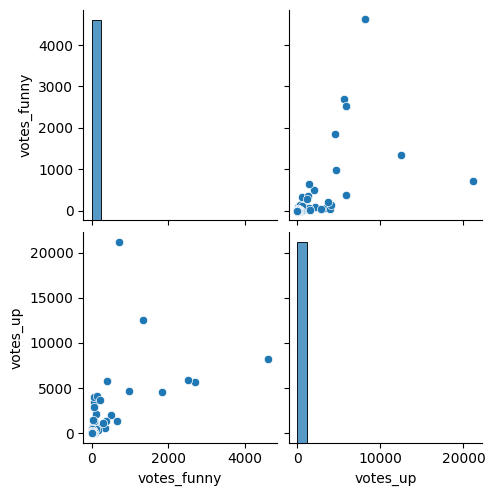

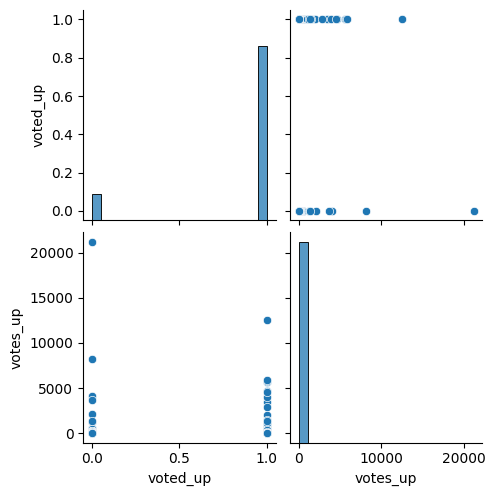

             votes_funny  votes_up
votes_funny      1.00000   0.61078
votes_up         0.61078   1.00000
          voted_up  votes_up
voted_up  1.000000 -0.013648
votes_up -0.013648  1.000000


In [10]:
# Add the correlation plot between 'votes_funny' and 'votes_up' and 'voted_up' and 'votes_up'
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[['votes_funny', 'votes_up']])
plt.show()
sns.pairplot(df[['voted_up', 'votes_up']])
plt.show()

# Add the correcation coefficient between 'votes_funny' and 'votes_up' and 'voted_up' and 'votes_up'
print(df[['votes_funny', 'votes_up']].corr())
print(df[['voted_up', 'votes_up']].corr())


# **Cleaning**

In [11]:
def clean_text(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # remove new lines with a space
    text = text.replace('\n', ' ')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lower case
    text = text.lower()

    return text

In [12]:
# Apply the cleaning function to each review
df['review'] = df['review'].apply(clean_text)

In [13]:
df

,review,votes_funny,language,voted_up,votes_up
0,,0,english,True,0
1,good fun co op worth every penny,0,english,True,0
2,was a little skeptical at first once i started playing i loved it if you wanna enjoy the game to...,0,english,True,0
3,very democratic,0,english,True,0
4,all for democracy,0,english,True,0
...,...,...,...,...,...
189595,cant even get past main loading screen anymore 1010 buy something else,0,english,False,0
189596,after multiple patches the servers seem much more stable i still get the occasional crash which ...,0,english,True,0
189597,greattt,0,english,True,0
189598,everything is perfect,0,english,True,0


# Checking for missing values in the dataset

In [14]:
# Check for empty sting or null values in each column and giving the count
print(df.isnull().sum(), '\n')

print(df.isna().sum(), '\n')


review         0
votes_funny    0
language       0
voted_up       0
votes_up       0
dtype: int64 

review         0
votes_funny    0
language       0
voted_up       0
votes_up       0
dtype: int64 



# Check if the reviews does not contain have alphanumeric characters

In [15]:
# check if the review doesnot contain any text or alphabets or numbers
df[df['review'].apply(lambda x: not any([a.isalnum() for a in x]))]

,review,votes_funny,language,voted_up,votes_up
0,,0,english,True,0
272,,0,english,True,0
333,,0,english,True,0
601,,0,english,True,0
611,,0,english,True,0
...,...,...,...,...,...
189275,,0,english,True,0
189343,,3,english,True,0
189476,,0,english,True,0
189484,,0,english,True,0


# Drop the rows that doesn't have any valid reviews

In [16]:
# drop the rows
df = df.drop(df[df['review'].apply(lambda x: not any([a.isalnum() for a in x]))].index)

In [17]:
df[df['review'].apply(lambda x: not any([a.isalnum() for a in x]))]

,review,votes_funny,language,voted_up,votes_up


The rows have been dropped and the dataset is now clean and ready for analysis.

# Checking the distribution of the target variable

<Axes: ylabel='Frequency'>

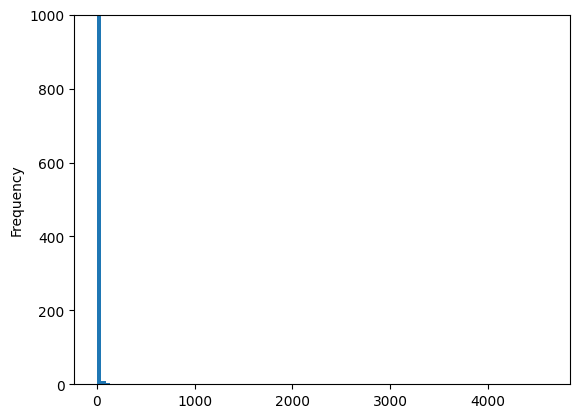

In [18]:
df['votes_funny'].plot(kind='hist', bins=100, ylim=(0, 1000))

In [19]:
# label 1 if votes_funny is greater than 0, else 0
df['label'] = (df['votes_funny'] > 0).astype(int)
df['label'].value_counts()

label
0    181472
1      6357
Name: count, dtype: int64

Since the target variable is heavily imbalanced, converting the target variable to a binary variable. If the review is funny, it is considered as 1 and if the review is not funny, it is considered as 0.

In [20]:
df['label'] = df['votes_funny'].apply(lambda x: 1 if x > 0 else 0)
df['label'].value_counts()

label
0    181472
1      6357
Name: count, dtype: int64

# Checking the correlation between the features and the target variable

In [21]:
## Checking the correlation between the features and the target variable
print(df[['voted_up', 'label']].corr())
print(df[['votes_up', 'label']].corr())

          voted_up     label
voted_up  1.000000 -0.119071
label    -0.119071  1.000000
          votes_up     label
votes_up  1.000000  0.053548
label     0.053548  1.000000


In [22]:
df['label'].value_counts()

label
0    181472
1      6357
Name: count, dtype: int64

Even after converting the target variable to a binary variable, the target variable is still imbalanced. So considering the reviews that are helpful and not helpful to fliter out the reviews that are not funny, to reduce the imbalance in the target variable.

# Keeping only the reviwes that are helpful in the reviews that are not funny

In [23]:
df1 = df.copy()

In [26]:
# remove the reviews which are not helpful and label = 0
df = df.drop(df[(df['votes_up'] == 0) & (df['label'] == 0)].index)
df['label'].value_counts()

label
0    24162
1     6357
Name: count, dtype: int64

In [34]:
df = df[['review', 'label']]
df['label'].value_counts()

label
0    24162
1     6357
Name: count, dtype: int64

In [43]:
df

,review,label
19,shoot gun kill bug kill robot unlock bigger gun shoot bigger bug shoot bigger robot fun,0
38,for god sake i need help in malevolent creek guys,0
44,this comment was redacted as it was too undemocratic to the super earth cause,0
65,only the best for super earth im doing my part even if im using a lowend laptop my life for libe...,1
68,having fun definitely worth the asking price if you enjoyed the first game youll like this o...,0
...,...,...
189569,for freedom liberty an democracy all in the name for super earth,0
189574,im doing my part,0
189584,for freedom for democracy for prosperity for super earth for liberteaaaa,1
189594,hey do you want a game that you can actually play go somewhere else legit anywhere else this gam...,1


In [38]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.2, random_state=42)

In [41]:
y_train.value_counts()

label
0    19332
1     5083
Name: count, dtype: int64

# **JUST CHECKING TEST DATA!**
# **NO MANIPULATION**

In [42]:
y_test.value_counts()

label
0    4830
1    1274
Name: count, dtype: int64

# Balancing the target variable with NLP balancing techniques


In [ ]:
# Balancing the target variable with NLP balancing techniques


# Preprocessing

In [44]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Use the 10,000 most common words
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=100)  # Make all reviews 100 words long

# Now 'padded_sequences' is a 2D array containing your preprocessed text data

In [45]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)



Epoch 1/10


153/153 [==============================] - 6s 20ms/step - loss: 0.5186 - accuracy: 0.7920 - val_loss: 0.5201 - val_accuracy: 0.7835
Epoch 2/10
153/153 [==============================] - 3s 18ms/step - loss: 0.5027 - accuracy: 0.7938 - val_loss: 0.5119 - val_accuracy: 0.7835
Epoch 3/10
153/153 [==============================] - 3s 18ms/step - loss: 0.4925 - accuracy: 0.7940 - val_loss: 0.5070 - val_accuracy: 0.7864
Epoch 4/10
153/153 [==============================] - 3s 18ms/step - loss: 0.4838 - accuracy: 0.7959 - val_loss: 0.5110 - val_accuracy: 0.7870
Epoch 5/10
153/153 [==============================] - 3s 19ms/step - loss: 0.4755 - accuracy: 0.7972 - val_loss: 0.5124 - val_accuracy: 0.7860
Epoch 6/10
153/153 [==============================] - 3s 18ms/step - loss: 0.4657 - accuracy: 0.8003 - val_loss: 0.5176 - val_accuracy: 0.7811
Epoch 7/10
153/153 [==============================] - 3s 19ms/step - loss: 0.4554 - accuracy: 0.8043 - val_loss: 0.5255 - val_accuracy: 0.

In [50]:
print(history.history)

{}


In [49]:
# check if the model is overfitting
import matplotlib.pyplot as plt

history = model.history
history

history.history.keys()

dict_keys([])